In [2]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import copy
import os
import pandas as pd
import pickle
import numpy.linalg as linalg
from sklearn.model_selection import train_test_split
from random import shuffle
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
import seaborn
from sklearn.linear_model import LogisticRegressionCV
from random import shuffle
from numpy.random import choice
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow.keras as keras
import cv2
import tensorflow as tf

In [4]:
#Cross validation 
def cross_validation_gaussian(train_new,train_label2,train_size):

    fold=5
    model=[]
    score_set=[]
    if len(train_new)%5==0:
        length=int(len(train_new)/5)
    else:
        length=int(len(train_new)/5)+1
    newlength=length
    counter=0
    for q in range(fold):
        valid_test_data=[]
        valid_test_label=[]
        valid_train_data=[]
        valid_train_label=[]
        if (max(len(train_new),length)==length):
            length=len(train_new)
#         print("Counter : ",counter)
#         print("End : ",length)
        for j in range(counter,length):
            valid_test_data.append(train_new[j])
            valid_test_label.append(train_label2[j])
        counter=counter+newlength
        length=length+newlength
        valid_test_data=valid_test_data
        valid_test_label=valid_test_label
        for j in range(len(train_new)):
            if train_new[j] not in valid_test_data:
                valid_train_data.append(train_new[j])
                valid_train_label.append(train_label2[j])
#         print(q)
#         print("Data : ",valid_train_data)
#         clf = LogisticRegressionCV(random_state=0, solver='lbfgs',multi_class='multinomial').fit(copy.deepcopy(np.array(valid_train_data)), copy.deepcopy(np.array(valid_train_label)))
        clf = GaussianNB().fit(np.array(valid_train_data), np.array(valid_train_label))
        a=[]
        a=clf.predict(np.array(valid_test_data))
        score=clf.score(np.array(valid_test_data),np.array(valid_test_label))
        score_set.append(score)
        model.append(clf) 
        del clf


    return model,score_set
    
    

In [5]:
#Cross validation 
def cross_validation_svm(train_new,train_label2,train_size):

    fold=5
    model=[]
    score_set=[]
    if len(train_new)%5==0:
        length=int(len(train_new)/5)
    else:
        length=int(len(train_new)/5)+1
    newlength=length
    counter=0
    for q in range(fold):
        valid_test_data=[]
        valid_test_label=[]
        valid_train_data=[]
        valid_train_label=[]
        if (max(len(train_new),length)==length):
            length=len(train_new)
#         print("Counter : ",counter)
#         print("End : ",length)
        for j in range(counter,length):
            valid_test_data.append(train_new[j])
            valid_test_label.append(train_label2[j])
        counter=counter+newlength
        length=length+newlength
        valid_test_data=valid_test_data
        valid_test_label=valid_test_label
        for j in range(len(train_new)):
            if train_new[j] not in valid_test_data:
                valid_train_data.append(train_new[j])
                valid_train_label.append(train_label2[j])
#         print(q)
#         print("Data : ",valid_train_data)
#         clf = LogisticRegressionCV(random_state=0, solver='lbfgs',multi_class='multinomial').fit(copy.deepcopy(np.array(valid_train_data)), copy.deepcopy(np.array(valid_train_label)))
#         clf = GaussianNB().fit(np.array(valid_train_data), np.array(valid_train_label))
        clf = svm.SVC(gamma=0.001)
        clf.fit(np.array(valid_train_data), np.array(valid_train_label))
        a=[]
        a=clf.predict(np.array(valid_test_data))
        score=clf.score(np.array(valid_test_data),np.array(valid_test_label))
        score_set.append(score)
        model.append(clf) 
        del clf


    return model,score_set
    
    

In [6]:
#Cross validation 
def cross_validation_logistic(train_new,train_label2,train_size):

    fold=5
    model=[]
    score_set=[]
    if len(train_new)%5==0:
        length=int(len(train_new)/5)
    else:
        length=int(len(train_new)/5)+1
    newlength=length
    counter=0
    for q in range(fold):
        valid_test_data=[]
        valid_test_label=[]
        valid_train_data=[]
        valid_train_label=[]
        if (max(len(train_new),length)==length):
            length=len(train_new)
#         print("Counter : ",counter)
#         print("End : ",length)
        for j in range(counter,length):
            valid_test_data.append(train_new[j])
            valid_test_label.append(train_label2[j])
        counter=counter+newlength
        length=length+newlength
        valid_test_data=valid_test_data
        valid_test_label=valid_test_label
        for j in range(len(train_new)):
            if train_new[j] not in valid_test_data:
                valid_train_data.append(train_new[j])
                valid_train_label.append(train_label2[j])
#         print(q)
#         print("Data : ",valid_train_data)
        clf = LogisticRegressionCV(random_state=0, solver='lbfgs',multi_class='multinomial').fit(np.array(valid_train_data), np.array(valid_train_label))
#         clf = GaussianNB().fit(np.array(valid_train_data), np.array(valid_train_label))
        a=[]
        a=clf.predict(np.array(valid_test_data))
        score=clf.score(np.array(valid_test_data),np.array(valid_test_label))
        score_set.append(score)
        model.append(clf) 
        del clf


    return model,score_set
    
    

In [7]:
#geeks for geeks 
def sort_list(list1, list2): 
  
    zipped_pairs = zip(list2, list1) 
  
    z = [x for _, x in sorted(zipped_pairs)] 
      
    return z 

In [8]:
def find_tpr_fpr(predict,real,checker):
    tp=0
    tn=0
    fp=0
#     print("find_tpr_fpr")
    fn=0
    voc=copy.deepcopy([0,1])
    v=voc.index(checker)
    del voc[v]
    for i in range(len(predict)):
        if predict[i]==checker and real[i]==checker:
            tp=tp+1
        if (predict[i] in voc ) and real[i]==checker:
            fn=fn+1
        if predict[i]==checker and (real[i] in voc):
            fp=fp+1
        if (predict[i] in voc) and (real[i] in voc):
            tn=tn+1
    tpr2=0
    fpr2=0
#     print("Total :",(tp+fp+tn+fn))
    tpr2=float(tp/float(tp+fn))   
    fpr2=float(fp/float(fp+tn))
    
    return tpr2,fpr2

In [26]:
def roc_design(prob_dist,testdata,checker):
    aux1=[]
    aux2=[]
    testdata1=copy.deepcopy(testdata)
    for i in range(len(testdata)):
        
        aux1.append(prob_dist[i])
        aux2.append(testdata[i])
    main1=sort_list(aux2, aux1)
#     print("Probability in incresing order : ",main1)
    
    tpr=[]
    fpr=[]
    #aux1 has prob_distribution and main1 has testlabel in sorted order
   
    main2=[]
    j=0
    for j in range(len(prob_dist)):
        main2.append(checker)
    i=0
    #Logic 
    if (checker+1)==2:
        flag=checker-1
    else:
        flag=checker+1
        
    while i <len(prob_dist):
        tpr1=0
        fpr1=0
        j=0
        
        while (j  <= i):
            main2[j]=flag
            j=j+1
#         j=i
#         while j <len(prob_dist):
#             main1[j]=2
#             j=j+1
#         print(main1)
#         m=[]
#         tpr.append(tpr1)
#         fpr.append(fpr1)
        tpr1,fpr1=find_tpr_fpr(copy.deepcopy(main2),copy.deepcopy(main1),checker)
#         e.append(testdata)
#         d.append(main1)
        fpr.append(fpr1)
        tpr.append(tpr1)
        
        i=i+50
    return tpr,fpr


In [10]:
pwd

'/home/suraj18025/Project'

In [11]:
os.chdir('Project')

FileNotFoundError: [Errno 2] No such file or directory: 'Project'

In [12]:
pwd

'/home/suraj18025/Project'

In [13]:
data= pickle.load(open("master_data.txt", "rb"))

In [14]:
len(data)

19370

In [15]:
def convert1(label):
    if label=='f':
        return 1
    return 0

In [16]:
# train_label=df['gender'].tolist()
# train_data=df['pixels'].tolist()
train_label=[]
train_data=[]
for i in range(len(data)):
    train_label.append(convert1(data[i][2]))
    train_data.append(data[i][3].tolist())


In [17]:
fold=5
train_size=len(train_data)
valid_size=int(train_size/float(fold))

In [18]:
def convert(temp):
    temp1=[int(temp[i]) for i in range(len(temp))]
    return temp1

In [19]:
main_data_set=[]
for i in range(len(train_data)):
    temp=[]
    temp.append(train_data[i])
    temp.append(train_label[i])
    main_data_set.append(temp)


In [20]:
#Size of  train image and test image
train_size=int(0.7*len(main_data_set))
test_size=int(0.3*len(main_data_set))
#Spliting the dataset 
shuffled_data=random.sample(main_data_set, len(main_data_set))
X_train=shuffled_data[:train_size]
X_test=shuffled_data[train_size:]

In [21]:
train_data=[]
train_label=[]
for i in range(len(X_train)):
    train_data.append(X_train[i][0])
    train_label.append(X_train[i][1])

In [22]:
test_data=[]
test_label=[]
for i in range(len(X_test)):
    test_data.append(X_test[i][0])
    test_label.append(X_test[i][1])

In [23]:
fold=5
train_size=len(train_data)
valid_size=int(train_size/float(fold))

# SVM

In [ ]:
model,score_set=cross_validation_svm(train_data,train_label,train_size)

In [ ]:
score_mean=np.mean(np.array(score_set))
standard_dev=np.std(np.array(score_set))
print("Standard deviation : ",standard_dev)
print("Mean of accuracy :",score_mean)
print("Accuracy for each validation : ",score_set)


In [ ]:
best=model[np.argmax(score_set)]
best_score=best.score(test_data,test_label)
prob_dist=best.predict_proba(np.array(test_data)).tolist()
label_pred=best.predict(test_data).tolist()
print("Test Accuracy by best model in cross validation : ",best_score)

# Naive Bayes

In [23]:
model,score_set=cross_validation_gaussian(train_data,train_label,train_size)

In [34]:
score_mean=np.mean(np.array(score_set))
standard_dev=np.std(np.array(score_set))
print("Standard deviation : ",standard_dev)
print("Mean of accuracy :",score_mean)
print("Accuracy for each validation : ",score_set)
best=model[np.argmax(score_set)]
best_score=best.score(test_data,test_label)
prob_dist=best.predict_proba(test_data).tolist()
label_pred=best.predict(test_data).tolist()
prob_dist=np.transpose(prob_dist)
print("Test Accuracy by best model in cross validation : ",best_score)

Standard deviation :  0.005072727117810345
Mean of accuracy : 0.5931849539024341
Accuracy for each validation :  [0.5977138643067846, 0.5921828908554573, 0.6002949852507374, 0.5877581120943953, 0.5879749170047953]
Test Accuracy by best model in cross validation :  0.5866460161762175


0
1


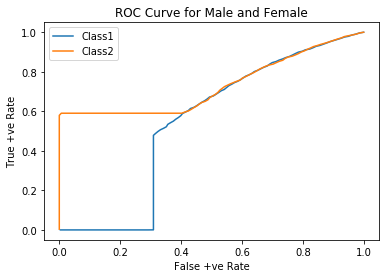

In [35]:
# ROC Curve 
prob_dist=np.transpose(prob_dist)
for i in range(2):
    print(i)
    tpr,fpr=roc_design(prob_dist[i],test_label,i)
    plt.plot(fpr, tpr ,label="Class"+str(i+1))
# roccurve(prob_dist,test_label)
plt.xlabel("False +ve Rate")
plt.ylabel("True +ve Rate")
plt.legend()
plt.title("ROC Curve for Male and Female")
plt.show()

# Logistic Regreesion

In [24]:
model,score_set=cross_validation_logistic(train_data,train_label,train_size)

In [25]:
score_mean=np.mean(np.array(score_set))
standard_dev=np.std(np.array(score_set))
print("Standard deviation : ",standard_dev)
print("Mean of accuracy :",score_mean)
print("Accuracy for each validation : ",score_set)
best=model[np.argmax(score_set)]
best_score=best.score(test_data,test_label)
prob_dist=best.predict_proba(test_data).tolist()
label_pred=best.predict(test_data).tolist()
print("Test Accuracy by best model in cross validation : ",best_score)

Standard deviation :  0.00678774634907682
Mean of accuracy : 0.6705507116750395
Accuracy for each validation :  [0.6736725663716814, 0.672566371681416, 0.6795722713864307, 0.6592920353982301, 0.6676503135374401]
Test Accuracy by best model in cross validation :  0.6761314747891929


In [ ]:
temp=[]
for i in range(len(train_label)):
    if train_label[i]=='f':
        temp.append(1)
    else:
        temp.append(0)
train_label=copy.deepcopy(temp)

# Neural Network

In [1]:
x_train=np.array(train_data)
y_train=np.array(train_label)
x_test=np.array(test_data)
y_test=np.array(test_label)

NameError: name 'np' is not defined

In [37]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
model = tf.keras.models.Sequential()

In [41]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

In [42]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=50)

# Adaboosting

In [ ]:
def adaboost(n,train_data1,train_label1,test_data,test_label,weights,d):
    
    alpha_k=[]
    Ck=[]
    nat=[i for i in range(len(train_data1))]
    main_data=copy.deepcopy(train_data1)
    main_label=copy.deepcopy(train_label1)
    
    for i in range(n):
        print(i)
#         print("Hello : ",i)
        sample = choice(nat, d,p=weights,replace=False)
#         sample = choice(nat,d,weights,replace=False)
        train_data=[]
        train_label=[]
        for j in range(len(sample)):
            train_data.append(train_data1[sample[j]])
            train_label.append(train_label1[sample[j]])
        
        clf=DecisionTreeClassifier(max_depth=3,max_leaf_nodes=10)
        clf.fit(np.array(train_data),np.array(train_label))
        predict1=clf.predict(np.array(main_data))
        h=labelling(predict1.tolist(),main_label)
        train_err=clf.score(np.array(train_data),np.array(train_label))
        train_err=1-train_err
        alpha=0.5*np.log((1-train_err)/float(train_err))+np.log(25)
        alpha_k.append(alpha)
        Ck.append(clf)
#         print("Hello1 : ",i)
        for j in range(len(weights)):
            
            if h[j]==1:
                
                weights[j]=weights[j]*math.exp((-1)*alpha)
            else:
                weights[j]=weights[j]*math.exp(alpha)
        w=copy.deepcopy(weights)
        total=np.sum(w)
        for j in range(len(weights)):
            weights[j]=weights[j]/float(total)
#         print("Hello2 : ",i)
 #For test set
    test_predict=[]
    for i in range(len(test_data)):
        disc_func=[[] for i in class_label]
        for j in range(k_max):
            index=Ck[j].predict(np.array(test_data[i]).reshape(1,-1)).tolist()[0]
            if disc_func[index]==[]:
                disc_func[index].append(alpha_k[j])
            else:
                disc_func[index][0]+=alpha_k[j]
        test_predict.append(disc_func.index(max(disc_func)))

    test_acc=accuracy(test_predict,test_label)   
# For train set
    train_predict=[]
#     for i in range(len(train_data1)):
#         disc_func1=[[] for i in class_label]
#         for j in range(k_max):
#             index=Ck[j].predict(np.array(train_data1[i]).reshape(1,-1)).tolist()[0]
#             if disc_func1[index]==[]:
#                 disc_func1[index].append(alpha_k[j])
#             else:
#                 disc_func1[index][0]+=alpha_k[j]
#         train_predict.append(disc_func1.index(max(disc_func1)))

#     train_acc=accuracy(train_predict,train_label1)  
    train_acc=0
    return Ck,alpha_k,train_predict,test_predict,train_acc,test_acc
            

In [ ]:
k_max=50
d=3000
class_label=list(set(train_label))


In [ ]:
weights=[1/float(len(train_data)) for i in train_data]
Ck,alpha_k,train_result,test_result,train_acc,test_acc=adaboost(k_max,train_data,train_label,test_data,test_label,weights,d)

In [ ]:
print("Accuracy in training : ",train_acc)
print("Accuracy in testing : ",test_acc)

# Histogram as feature set

In [ ]:
def histogram(train_data):
    hist=[0]*256
    for i in range(len(train_data)):
        hist[train_data[i]]+=1
    return hist
        

In [ ]:
train_data1=[]
for i in range(len(train_data)):
    train_data1.append(histogram(train_data[i]))
test_data1=[]
for i in range(len(test_data)):
    test_data1.append(histogram(test_data[i]))



In [ ]:
train_data=copy.deepcopy(train_data1)
test_data=copy.deepcopy(test_data1)


# Logistic Regression

In [ ]:
model,score_set=cross_validation_logistic(train_data,train_label,train_size)

In [ ]:
score_mean=np.mean(np.array(score_set))
standard_dev=np.std(np.array(score_set))
print("Standard deviation : ",standard_dev)
print("Mean of accuracy :",score_mean)
print("Accuracy for each validation : ",score_set)
# best=model[np.argmax(score_set)]
# best_score=best.score(test_data,test_label)
# prob_dist=best.predict_proba(test_data).tolist()
# label_pred=best.predict(test_data).tolist()
# print("Test Accuracy by best model in cross validation : ",best_score)

# Naive Bayes

In [ ]:
model,score_set=cross_validation_gaussian(train_data,train_label,train_size)

In [ ]:
score_mean=np.mean(np.array(score_set))
standard_dev=np.std(np.array(score_set))
print("Standard deviation : ",standard_dev)
print("Mean of accuracy :",score_mean)
print("Accuracy for each validation : ",score_set)
# best=model[np.argmax(score_set)]
# best_score=best.score(test_data,test_label)
# prob_dist=best.predict_proba(test_data).tolist()
# label_pred=best.predict(test_data).tolist()
# print("Test Accuracy by best model in cross validation : ",best_score)

# SVM

In [ ]:
model,score_set=cross_validation_svm(train_data,train_label,train_size)

In [ ]:
score_mean=np.mean(np.array(score_set))
standard_dev=np.std(np.array(score_set))
print("Standard deviation : ",standard_dev)
print("Mean of accuracy :",score_mean)
print("Accuracy for each validation : ",score_set)
# best=model[np.argmax(score_set)]
# best_score=best.score(test_data,test_label)
# prob_dist=best.predict_proba(test_data).tolist()
# label_pred=best.predict(test_data).tolist()
# print("Test Accuracy by best model in cross validation : ",best_score)

# Neural Network

In [ ]:
x_train=np.array(train_data)
y_train=np.array(train_label)
x_test=np.array(test_data)
y_test=np.array(test_label)

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=50)

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

# Adaboosting

In [ ]:
k_max=50
d=3000
class_label=list(set(train_label))


In [ ]:
def labelling(predict,true):
    h=[]
    for i in range(len(predict)):
        if predict[i]==true[i]:
            h.append(1)
        else:
            h.append(0)
    return h

In [ ]:
weights=[1/float(len(train_data)) for i in train_data]
Ck,alpha_k,train_result,test_result,train_acc,test_acc=adaboost(k_max,train_data,train_label,test_data,test_label,weights,d)

In [ ]:
print("Accuracy in training : ",train_acc)
print("Accuracy in testing : ",test_acc)

# Bagging